0.6034118540639974
0.6469046034658178
0.604790964339612
0.691450904957338
0.17723812523163263


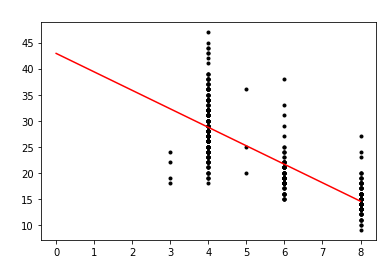

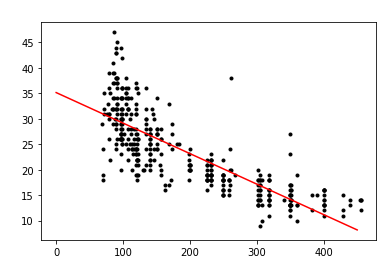

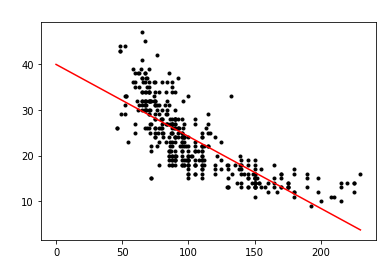

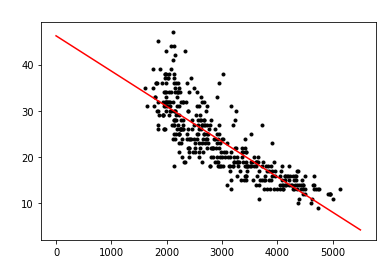

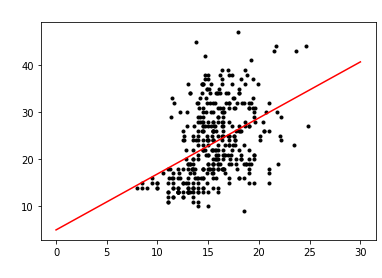

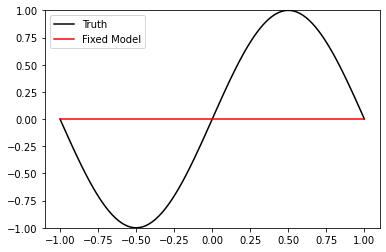

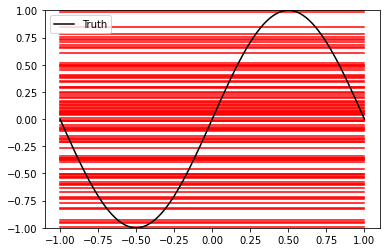

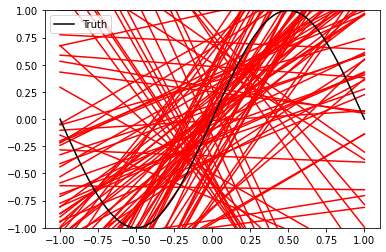

Square Bias of h(x) = 1.0000000000000000
Square Bias of g(x) = 0.9547170352399907
Square Bias of f(x) =  0.4105041484008597
Variance of h(x) = 0.0000000000000000
Variance of g(x) =  0.24923207057714006
Variance of f(x) =  1.0300708049300733


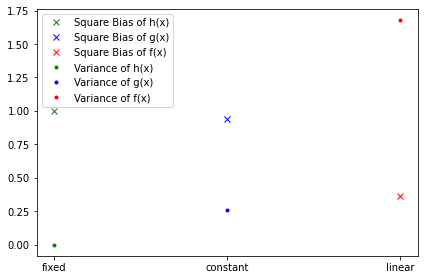

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import csv

with open("autoData.csv") as auto_file: 
    auto_data = csv.reader(auto_file)
    cylinders = []
    displacement = []
    horsepower = []
    acceleration = []
    weight=[]
    mpg=[]

    for line in auto_data:
        cylinders += [int(line[2])]
        displacement += [int(line[3])]
        horsepower += [int(line[4])]
        acceleration += [float(line[5])]
        weight += [int(line[6])]
        mpg += [int(line[7])]

mpg_avg = sum(mpg) / len(mpg)
cylinders_avg = sum(cylinders) / len(cylinders)
displacement_avg = sum(displacement) / len(displacement)
horsepower_avg = sum(horsepower) / len(horsepower)
acceleration_avg = sum(acceleration) / len(acceleration)
weight_avg = sum(weight) / len(weight)

def covariance(a, b):
    if len(a) != len(b):
        return
    a_mean = np.mean(a)
    b_mean = np.mean(b)
    sum = 0
    for i in range(0, len(a)):
        sum += ((a[i] - a_mean) * (b[i] - b_mean))
    return sum

def variance(a):
    a_mean = np.mean(a)
    sum = 0
    for i in range(0,len(a)):
        sum += (a[i] - a_mean)**2
    return sum

#cylinders
B1_cylinders = covariance(cylinders,mpg) / variance(cylinders)
B0_cylinders = mpg_avg - (B1_cylinders*cylinders_avg)
#displacement
B1_displacement = covariance(displacement,mpg) / variance(displacement)
B0_displacement = mpg_avg - (B1_displacement*displacement_avg)
#horsepower
B1_horsepower = covariance(horsepower,mpg) / variance(horsepower)
B0_horsepower = mpg_avg - (B1_horsepower*horsepower_avg)
#weight
B1_weight = covariance(weight,mpg) / variance(weight)
B0_weight = mpg_avg - (B1_weight*weight_avg)
#acceleration
B1_acceleration = covariance(acceleration,mpg) / variance(acceleration)
B0_acceleration = mpg_avg - (B1_acceleration*acceleration_avg)

def sse_cylinders(a,b):
    sum=0
    for i in range (0,len(a)):
        sum+= ((b[i] - (B0_cylinders + (B1_cylinders*a[i])))**2)
    return sum

def sse_displacement(a,b):
    sum=0
    for i in range (0,len(a)):
        sum+= ((b[i] - (B0_displacement + (B1_displacement*a[i])))**2)
    return sum

def sse_horsepower(a,b):
    sum=0
    for i in range (0,len(a)):
        sum+= ((b[i] - (B0_horsepower + (B1_horsepower*a[i])))**2)
    return sum

def sse_weight(a,b):
    sum=0
    for i in range (0,len(a)):
        sum+= ((b[i] - (B0_weight + (B1_weight*a[i])))**2)
    return sum

def sse_acceleration(a,b):
    sum=0
    for i in range (0,len(a)):
        sum+= ((b[i] - (B0_acceleration + (B1_acceleration*a[i])))**2)
    return sum

def sst(b):
    b_mean=np.mean(b)
    sum=0
    for i in range(0, len(b)):
        sum+=((b[i]-b_mean)**2)
    return sum

#Find and print R Squared Values
R2_cylinders = 1 - (sse_cylinders(cylinders,mpg) / sst(mpg))
print(R2_cylinders)
R2_displacement = 1 - (sse_displacement(displacement,mpg) / sst(mpg))
print(R2_displacement)
R2_horsepower = 1 - (sse_horsepower(horsepower,mpg) / sst(mpg))
print(R2_horsepower)
R2_weight = 1 - (sse_weight(weight,mpg) / sst(mpg))
print(R2_weight)
R2_acceleration = 1 - (sse_acceleration(acceleration,mpg) / sst(mpg))
print(R2_acceleration)

#Plot figures
fig1 = plt.figure(num=1, clear=True)
ax1 = fig1.add_subplot(1,1,1)
x=np.linspace(0,8,1000)
y= ((B0_cylinders) + (B1_cylinders*x))
ax1.scatter(cylinders, mpg, c="black", marker=".") 
plt.plot(x,y, '-r')
plt.xlabel("Cylinders", c="white")
plt.ylabel("MPG", c="white")
plt.title("MPG vs. Cylinders", c="white")
plt.show()

fig2 = plt.figure(num=2, clear=True)
ax2 = fig2.add_subplot(1,1,1)
x=np.linspace(0,450,1000)
y= ((B0_displacement) + (B1_displacement*x))
ax2.scatter(displacement, mpg, c="black", marker=".") 
plt.plot(x,y, '-r')
plt.xlabel("Displacement", c="white")
plt.ylabel("MPG", c="white")
plt.title("MPG vs. Displacement", c="white")
plt.show()

fig3 = plt.figure(num=3, clear=True)
ax3 = fig3.add_subplot(1,1,1)
x=np.linspace(0,230,1000)
y= ((B0_horsepower) + (B1_horsepower*x))
ax3.scatter(horsepower, mpg, c="black", marker=".") 
plt.plot(x,y, '-r')
plt.xlabel("Horsepower", c="white")
plt.ylabel("MPG", c="white")
plt.title("MPG vs. Horsepower", c="white")
plt.show()

fig4 = plt.figure(num=4, clear=True)
ax4 = fig4.add_subplot(1,1,1)
x=np.linspace(0,5500,1000)
y= ((B0_weight) + (B1_weight*x))
ax4.scatter(weight, mpg, c="black", marker=".") 
plt.plot(x,y, '-r')
plt.xlabel("Weight", c="white")
plt.ylabel("MPG", c="white")
plt.title("MPG vs. Weight", c="white")
plt.show()

fig5 = plt.figure(num=5, clear=True)
ax5 = fig5.add_subplot(1,1,1)
x=np.linspace(0,30,1000)
y= ((B0_acceleration) + (B1_acceleration*x))
ax5.scatter(acceleration, mpg, c="black", marker=".") 
plt.plot(x,y, '-r')
plt.xlabel("Acceleration", c="white")
plt.ylabel("MPG", c="white")
plt.title("MPG vs. Acceleration", c="white")
plt.show()

i=0
hx=[]
gx=[]
fx=[]
B1=[]
while i<1001:
        #models
        x1=np.random.uniform(-1,1)
        x2=np.random.uniform(-1,1)
        y1=np.sin(np.pi*x1)
        y2=np.sin(np.pi*x2)
        #fixed model
        hx.append(0)
        slope = (y2-y1) / (x2-x1)
        B1.append(slope)
        B0 = ((y2+y1) / 2)
        gx.append(B0)
        i+=1

fig6=plt.figure(num=6, clear=True)
ax6 = fig6.add_subplot(1,1,1)
x=np.linspace(-1,1,100)
y = np.sin(np.pi*x)
ax6.plot(x,y,'-', color='black', label='Truth')
ax6.plot(x, hx[:100], '-', color='red', label='Fixed Model')
plt.legend()
plt.ylim(-1,1)
plt.show()

fig7=plt.figure(num=7, clear=True)
ax7 = fig7.add_subplot(1,1,1)
for i in range(100):
    ax7.plot(x,gx[i]*np.ones(100), '-', color ='red')
ax7.plot(x,y,'-', color='black', label='Truth')
plt.legend()
plt.ylim(-1,1)
plt.show()

fig8=plt.figure(num=8, clear=True)
ax8 = fig8.add_subplot(1,1,1)
for i in range(100):
    ax8.plot(x, gx[i]+x*B1[i], '-', color='red')
ax8.plot(x,y,'-', color='black', label='Truth')
plt.legend()
plt.ylim(-1,1)
plt.show()
         

# x_pt=np.random.uniform(-1,1,size=1000)
# #x2=np.random.uniform(-1,1,size=1000)
# # if x1==x2:
# #     x2=np.random.uniform(-1,1, size=1000)
# y_pt=np.sin(np.pi*x_pt)
# #y2=np.sin(np.pi*x2)

# x1_avg = sum(x_pt) / len(x_pt)
# y1_avg = sum(y_pt) / len(y_pt)
# B1 = covariance(x_pt,y_pt) / variance(x_pt)
# B0 = y1_avg - (B1*x1_avg)
# print(B0)
# print(B1)

# fig6=plt.figure(num=6, clear=True)
# ax6 = fig6.add_subplot(1,1,1)
# ax6.scatter(x_pt,y_pt,c="black", marker=".")
# x=np.linspace(-1,1,100)
# y = x*0
# plt.plot(x,y,'-r')
# plt.ylim(-1,1)
# plt.show()

# fig7 = plt.figure(num=7, clear=True)
# ax7 = fig7.add_subplot(1,1,1)
# ax7.scatter(x_pt,y_pt,c="black", marker=".")
# x=np.linspace(-1,1,1)
# i=1
# while i<=100:
#     x1=np.random.uniform(-1,1)
#     x2=np.random.uniform(-1,1)
#     y1=np.sin(np.pi*x1)
#     y2=np.sin(np.pi*x2)
#     y = (y1+y2) / 2
#     plt.plot(x,y,'-r')
#     i+=1
# plt.ylim(-1,1)
# plt.show()

# fig8 = plt.figure(num=8, clear=True)
# ax8 = fig8.add_subplot(1,1,1)
# ax8.scatter(x_pt,y_pt,c="black", marker=".")
# x=np.linspace(-1,1,100)
# y= (B0) + (B1*x)
# plt.plot(x,y,'-r')
# plt.ylim(-1,1)
# plt.show()

diffE=0
diffV=0
for i in range(len(B1)):
        diffE+=(gx[i] - np.sin(np.pi*.5))
        Eg=(diffE/len(B1))**2
        g_bar=sum(gx)/len(gx)
        diffV += (gx[i] - g_bar)**2
        Vg = diffV/len(B1)
difE=0
difV=0
f_sum=0
for j in range(len(B1)):
    f_sum += gx[i] + .5*B1[i]
f_bar = f_sum/len(B1)
for i in range(len(B1)):
    difE += (gx[i] + 0.5*B1[i] - np.sin(np.pi*0.5))
    Ef = (difE/len(B1))**2
    difV += (gx[i] + 0.5*B1[i] - f_bar)**2
    Vf = difV/len(B1)
print('Square Bias of h(x) = 1.0000000000000000')
print('Square Bias of g(x) =', Eg )
print('Square Bias of f(x) = ', Ef)
print('Variance of h(x) = 0.0000000000000000')
print('Variance of g(x) = ', Vg)
print('Variance of f(x) = ', Vf)


fig9 = plt.figure(num=9, clear=True)
ax9=fig9.add_subplot(1,1,1)
ax9.xaxis.label.set_color('white')
ax9.plot("fixed", 1, 'x', color='green', label='Square Bias of h(x)')
ax9.plot("constant", 0.94, 'x', color='blue', label = 'Square Bias of g(x)')
ax9.plot("linear", 0.36, 'x', color='red', label='Square Bias of f(x)')
ax9.plot("fixed", 0, '.', color='green', label='Variance of h(x)')
ax9.plot("constant", 0.26, '.', color='blue', label='Variance of g(x)')
ax9.plot("linear", 1.68, '.', color='red', label = 'Variance of f(x)')
ax9.legend()
fig9.tight_layout()
